In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import json
import tensorflow as tf
import argparse
import numpy as np
from pathlib import Path
from time import strftime
from shutil import rmtree
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from rtapipe.lib.dataset.data_manager import DataManager
from rtapipe.lib.datasource.Photometry3 import OnlinePhotometry, SimulationParams
from rtapipe.lib.models.anomaly_detector_builder import AnomalyDetectorBuilder
from rtapipe.scripts.ml.offline.callbacks import CustomLogCallback
from rtapipe.lib.evaluation.custom_mse import CustomMSE
from rtapipe.lib.plotting.plotting import plot_sequences, loss_plot

In [3]:
SCALER_TYPE="minmax"
output_dir = "./logs/check_distibution_of_training_set_out"
dataset_folder = "/data01/homes/baroncelli/phd/rtapipe/scripts/ml/dataset_generation/train/North_z40_5h_LST/train_set_c/fits_data"
fits_files = DataManager.load_fits_data(dataset_folder, limit=1)

Loaded 1 files


In [5]:
multiple_templates = False
add_target_region = False
integration_time = 5
number_of_energy_bins = 3
tsl = 3600
threads = 30
normalize = True
sim_params = SimulationParams(runid="run0406_ID000126", onset=0, emin=0.04, emax=1, tmin=0, tobs=18000, offset=0.5, irf="North_z40_5h_LST", roi=2.5, caldb="prod5-v0.1", simtype="bkg")
data_manager = DataManager(output_dir)
data_manager.transform_to_timeseries(fits_files, sim_params, add_target_region, integration_time=integration_time, number_of_energy_bins=number_of_energy_bins, tsl=tsl, normalize=normalize, threads=threads, multiple_templates=multiple_templates)

[2022-12-05 16:12:38.496860] Preconfiguring regions. Normalization: True - Template: notemplate
[2022-12-05 16:12:42.660853] Found 85 regions and 0 target regions


100%|███████████████████████████████████████████| 1/1 [36:47<00:00, 2207.35s/it]

[2022-12-05 16:49:30.090425] Saved data to logs/check_distibution_of_training_set_out/data_cache


In [11]:
data_manager.data["notemplate"].shape

(85, 3600, 3)

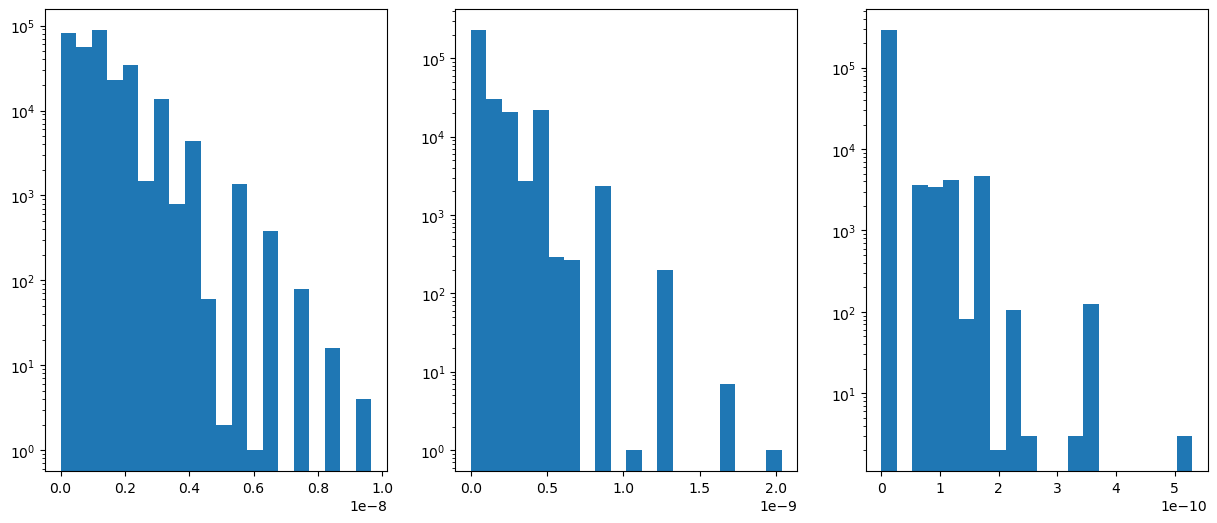

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,3, figsize=(15,6) )

for i in range(3):
    feat = data_manager.data["notemplate"][:,:,i].flatten()
    axes[i].hist(feat, bins=20)
    axes[i].set_yscale("log")


In [40]:
train_x, train_y , val_x, val_y = data_manager.get_train_set("notemplate", sub_window_size=5, stride=5, validation_split=80, scaler_type=SCALER_TYPE)

[2022-12-05 17:01:56.468029] Extracting subsequences of 5 points with stride 5 from 85 time series
[2022-12-05 17:01:56.578474] Extracted 61200 subsequences
[2022-12-05 17:01:56.585137] Train set shape: (48960, 5, 3) - Validation set shape: (12240, 5, 3)
[2022-12-05 17:01:56.585245] Data will be scaled to 0-1


In [41]:
train_x.shape

(48960, 5, 3)

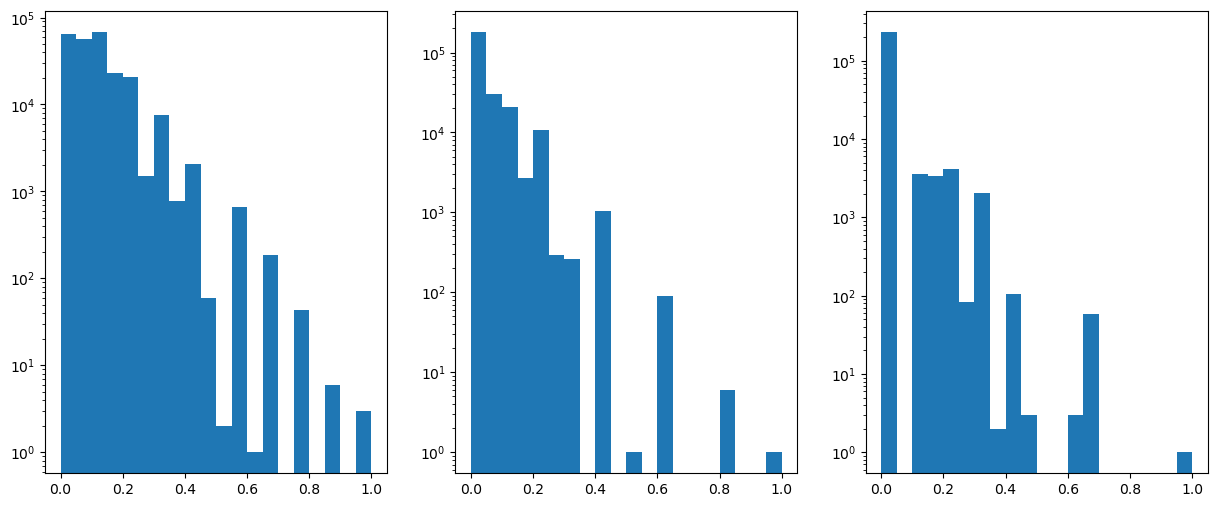

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,3, figsize=(15,6) )

for i in range(3):
    feat = train_x[:,:,i].flatten()
    axes[i].hist(feat, bins=20)
    axes[i].set_yscale("log")

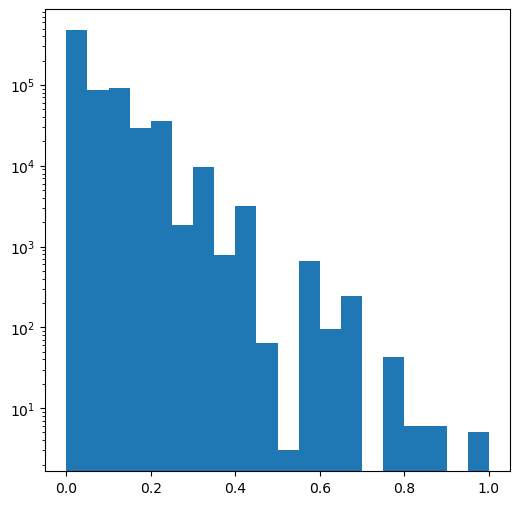

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(6,6) )
feat = train_x[:,:,:].flatten()
ax.hist(feat, bins=20)
ax.set_yscale("log")

In [48]:
data_manager.data["notemplate"].shape

(85, 3600, 3)

[]

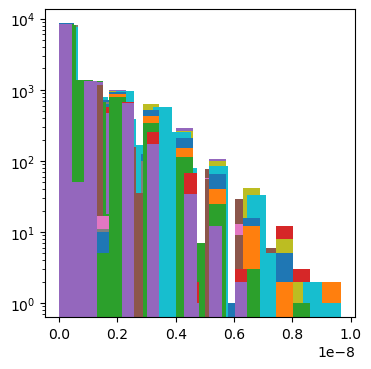

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(4,4) )

for i in range(85):
    feat = data_manager.data["notemplate"][i,:,:].flatten()
    ax.hist(feat, bins=15)
    ax.set_yscale("log")
plt.plot()